![speed-dating](https://www.lespeeddating.com/img/cms/soiree_speed-dating-images.jpg)


# <span style="color:pink"><center>Speed dating</center></span> 

Pour notre Premier projet nous essairons de comprendre l' amour ! C'est un sujet très compliqué. Notre objectif va être de comprendre ce qui se passe lors d'un speed dating et surtout de comprendre ce qui va influencer l'obtention d'un deuxième rendez-vous.



In [23]:
# import des differentes librairies
!pip install plotly -q
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn import metrics
from math import pi

In [24]:
data=pd.read_csv ('Speed_dating_data.csv', encoding="ISO-8859-1")

In [25]:
#data.describe(include='all')
data.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [26]:
data.shape # 8378 lignes et 195 colonnes

(8378, 195)

In [27]:
#Laissez tomber les indices manquants.
data.isnull().sum()

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

Nous pouvons constaster qu'il y a 8 378 lignes et de nombreuses colonnes comportant des NaN.
Lors de cette analyse, il faut être vigilant sur les imputations, car elles pourraient modifier 
les données des graphiques.
On remarque également qu'il existe un très grand nombre de variables.
J'ai donc décidé de me concentrer sur la race des participants pour décrocher un deuxième rendez-vous.

In [28]:
#on remplace le nom des colonnes afin d'avoir une meilleure lisibilité
#sur les données de chaque colonnes

data.rename(columns={"gender": "Genre", 
                     "age_o":"age partenaire",
                     "race_o":"race partenaire",
                     "dec_o":"decision partenaire",
                     "imprace":"importance de la race",
                     "from":"origine",
                     "date":"fréquence des rendez-vous"}, inplace=True)

#Créer un dictionnaire avec des clés et des valeurs. On écrasera ensuite les clés du dataset
# pour les remplacer par des valeurs.

gender_changement = { 0 : 'Femme',1 : 'Homme'}

decision_changement={1:"Oui",0:"Non"}

samerace_changement={1:"Oui",0:"Non"}

race_changement = {1: 'Africain', 2: 'Européen', 3: 'Hispanique', 4: 'Asiatique', 5: 'Américain',6:'Autres'}

field_changement = {1:"Droit",2:"Math",3:"science sociale",4:"science medicale",5:"Ingénieur",6:"Journalisme",
                   7:"Histoire",8:"Econ/Finance",9:"Education",10:"Science biologique",11:"Social",12:"indécis",
                   13:"Science politique",14:"Film",15:"Beaux arts",16:"Langue",17:"Architecture",18:"Autres"}


In [29]:
#on remplace les clés du dataset par des noms que nous avons définis plus haut
data['Genre'].replace(gender_changement, inplace = True)
data["field_cd"].replace(field_changement, inplace = True)
data["decision partenaire"].replace(decision_changement, inplace = True)
data["race partenaire"].replace(race_changement, inplace = True)
data['race'].replace(race_changement, inplace = True)
data['dec'].replace(decision_changement, inplace = True)
data['samerace'].replace(samerace_changement, inplace = True)

In [30]:
data.head()

,iid,id,Genre,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,Femme,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,Femme,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,Femme,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,Femme,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,Femme,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


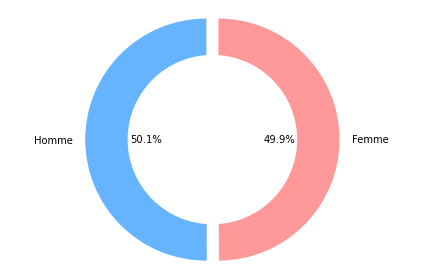

In [31]:
colors = ['#66b3ff','#ff9999','#66b3ff','#99ff99','#ffcc99']
data_pie = data['Genre'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(data_pie.values,
        colors = colors,
        labels=data_pie.index,
        explode = (0.05,0.05),
        autopct='%1.1f%%',
        pctdistance=0.5,
        startangle=90)
#centre du cercle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

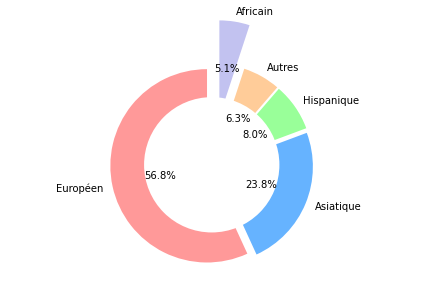

In [32]:
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']
data_pie = data['race'].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(data_pie.values,
        colors = colors,
        labels=data_pie.index,
        explode = (0.05,0.05,0.05,0.05,0.5),
        autopct='%1.1f%%',
        pctdistance=0.5,
        startangle=90)
#centre du cercle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

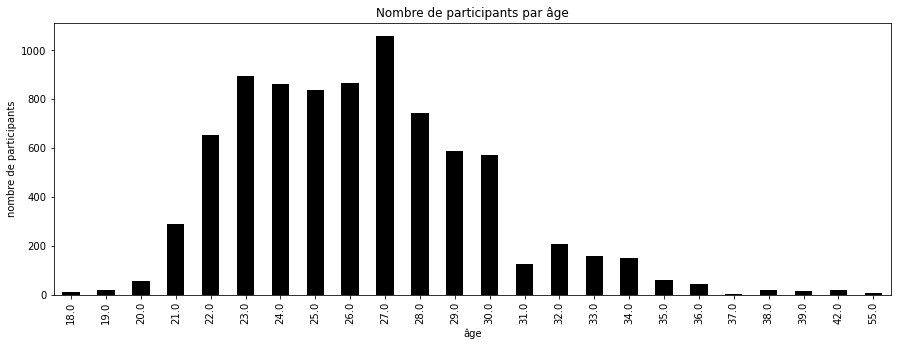

In [33]:
df_pays = data.groupby(['age']).count()
df_pays['Genre'].plot(kind='bar',
                    title='Nombre de participants par âge',
                    ylabel='nombre de participants',
                    xlabel='âge',
                    color=['black'],
                    figsize=(15, 5),
                    legend = False)
plt.show()

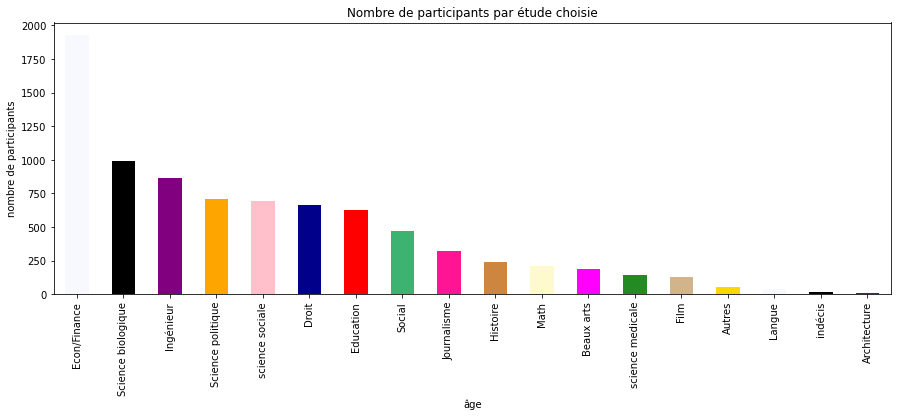

In [34]:
df_pays = data['field_cd'].value_counts()
df_pays.plot(kind='bar',
                    title='Nombre de participants par étude choisie',
                    ylabel='nombre de participants',
                    xlabel='âge',
                    color=['ghostwhite','black','purple','orange','pink','darkblue','r',
                           'mediumseagreen','deeppink','peru','lemonchiffon',
                           'fuchsia','forestgreen','tan','gold'],
                    figsize=(15, 5),
                    legend = False)
plt.show()

Sur les 8 376 étudiants, on remarque que les hommes et les femmes sont representés de mannière égale.
La tranche d'âge majoritaire sont les 23/27 ans avec plus de 10% d'étudiants. 
Cela peut s'expliquer, car c'est le parcours classique d'un étudiant qui poursuit sa scolarité.
On remarque que 56% des étudiants sont des européens, 23% sont des asiatiques et pour finir 8% sont des hispaniques.
Les secteurs d'études les plus plébiscités sont l'économie, la finance,les sciences biologiques et les études d'ingénieur.

Lorsque l'on étudie ces différentes données, nous pouvons donc dire que les européens sont surreprésentés et l'âge varie en fonction du type d'étude et de la durée. 

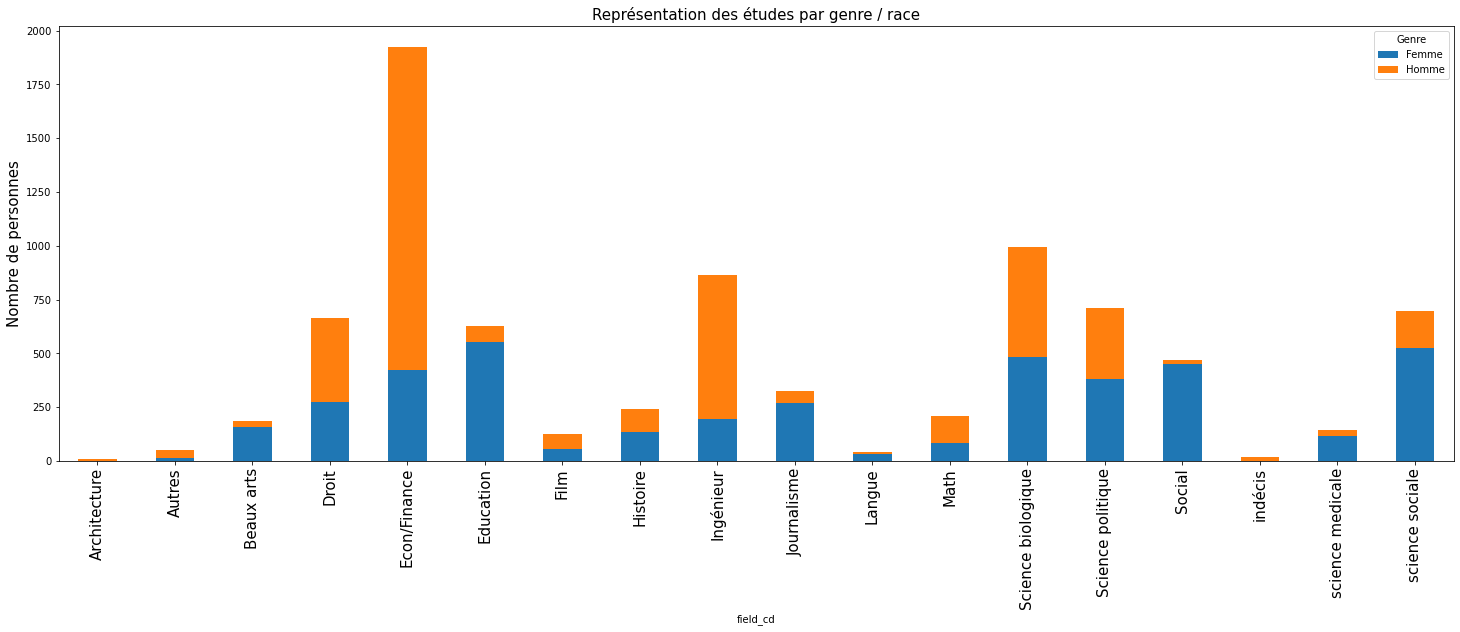

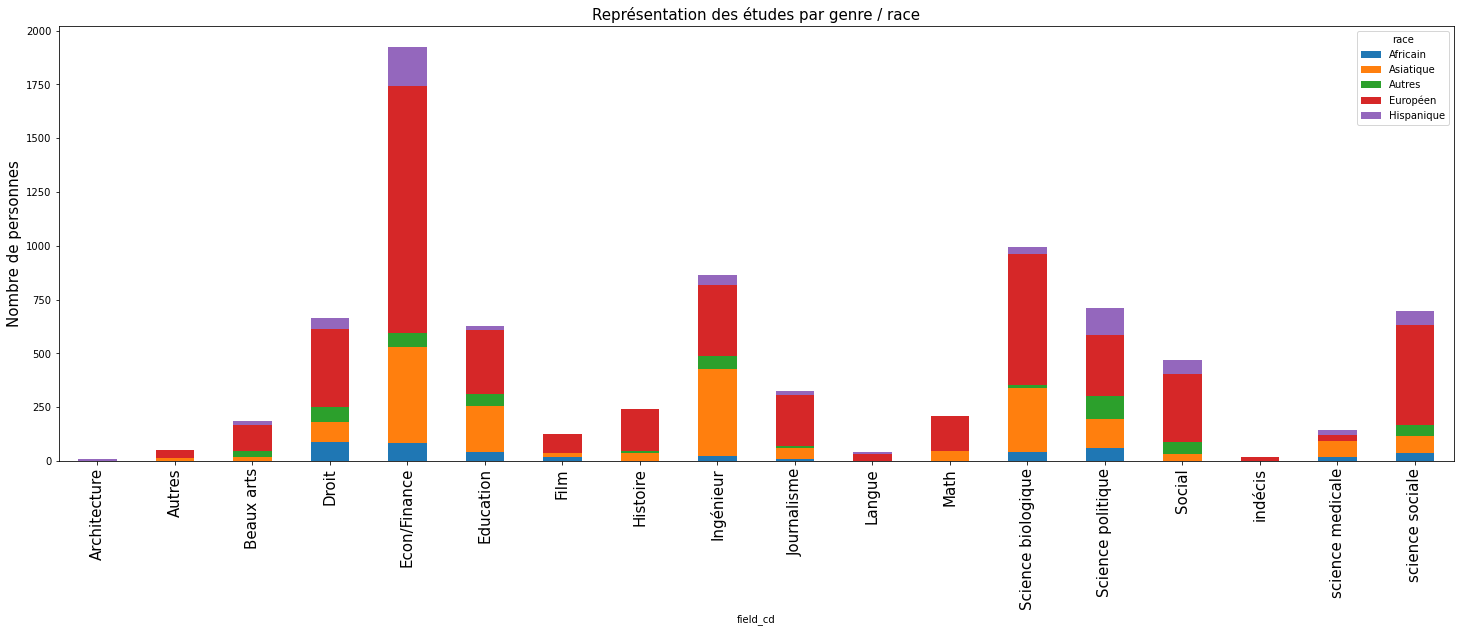

In [46]:
def Barchart(v1, v2):
    
    gb = data[[v1, v2]].groupby([v1, v2]).size().unstack()
    ax = gb.plot(kind='bar', figsize=(25,8), stacked=True)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15,color = 'black')
    ax.set_title("Représentation des études par genre / race", fontsize=15)
    ax.set_ylabel('Nombre de personnes',fontsize=15)
    plt.show()
    
Barchart('field_cd','Genre')    
#Barchart('age','field_cd')
#Barchart('age','race')
Barchart('field_cd','race')

L'ingénierie, la finance et les mathématiques sont majoritairement dominées par les hommes.
Les sciences sociales et médicales, les arts,le journalisme sont davantages dominés par les femmes. 

Les sciences naturelles, les sciences politiques et le cinéma sont représentés de manière très égales par les deux sexes.

Au regard des différents graphiques ci-dessus, on a pu catégoriser la répartition des différentes communautés dans chaque domaine. En plus de ce critère, nous avons pu affiner notre analyse en mettant en avant la répartition des genres, des âges pour avoir un ciblage plus pertinent.

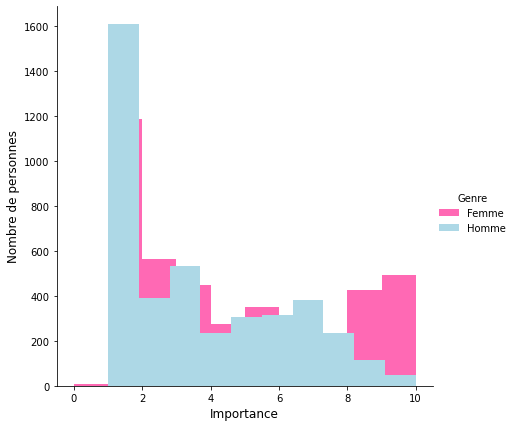

In [36]:
bar = sns.FacetGrid(data, height = 6,hue_kws={'color': ['hotpink','lightblue']}, hue="Genre")
bar.map(plt.hist, 'importance de la race', bins=10)
bar.set_xlabels('Importance', fontsize=12)
bar.set_titles("L'importance de la race par Genre", fontsize=15)
bar.set_ylabels('Nombre de personnes',fontsize=12)
bar.add_legend();

Lors d'un speed-dating les femmes accordent plus d'importance à la communauté de l'autre individu que les hommes.

Ce graphique illustre l'intérêt de la communauté du partenaire en fonction de la race. 

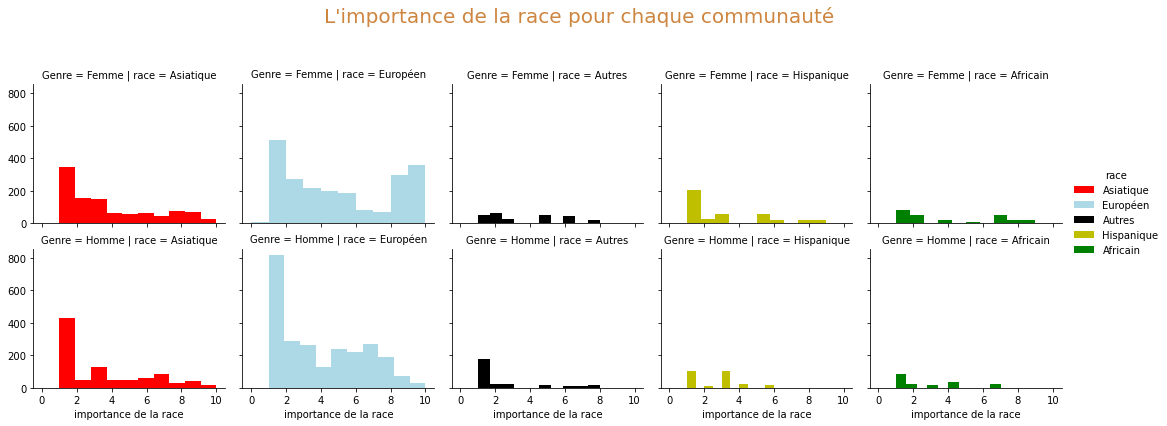

In [37]:
f = sns.FacetGrid(data,row='Genre', col='race',hue_kws={'color': ['r', 'lightblue','black','y','g']}, hue="race")
f.map(plt.hist, 'importance de la race', bins=10)
axes = f.axes.flatten()
plt.subplots_adjust(top=0.8)
f.fig.suptitle("L'importance de la race pour chaque communauté", fontsize=20,color='peru')
f.add_legend();

/opt/conda/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1373: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


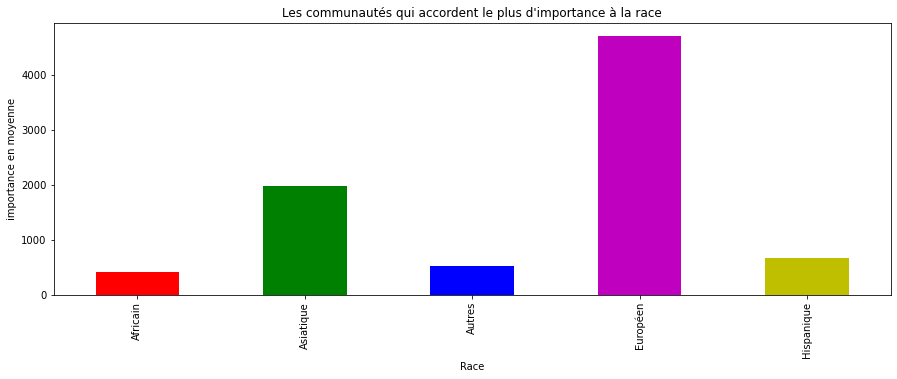

In [38]:
importanceR=data[['race', 'importance de la race']].groupby('race').count()
importanceR.plot(kind='bar',
                    title="Les communautés qui accordent le plus d'importance à la race",
                    ylabel='importance en moyenne',
                    xlabel='Race',
                    color=['rgbmy'],
                    figsize=(15, 5),
                    legend = False,
                    )
plt.show()

Ce sont les européens qui accordent le plus d'importance à la race, plus particulièrement les femmes

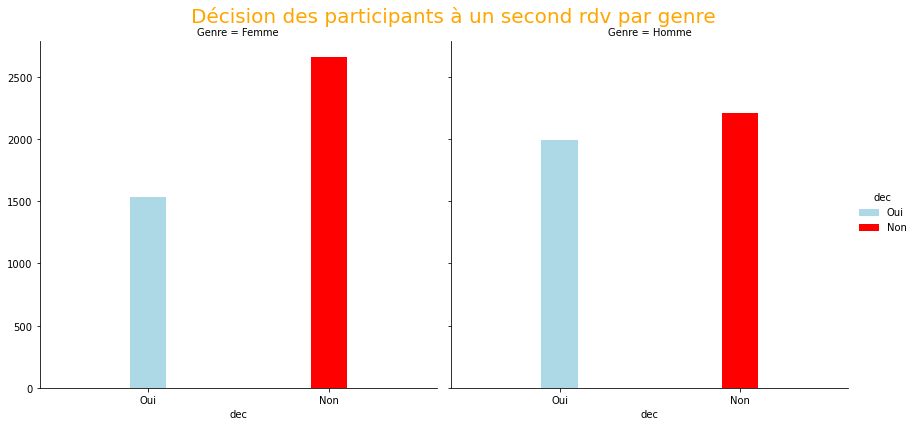

In [39]:
g = sns.FacetGrid(data, col='Genre',height = 6,hue_kws={'color': ['lightblue','red','y','g']}, hue="dec")
g.map(plt.hist, 'dec', bins=5)
axes = g.axes.flatten()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Décision des participants à un second rdv par genre", fontsize=20, color='orange')
g.add_legend();

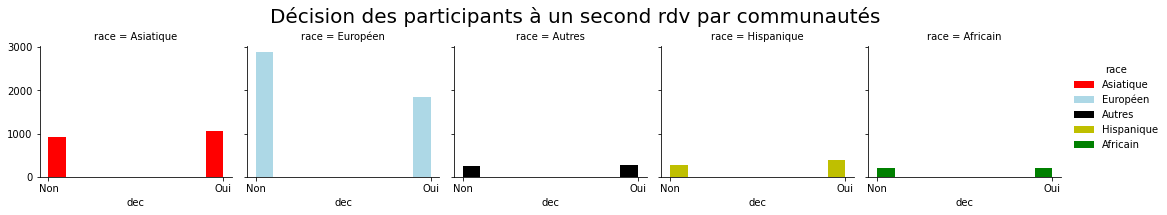

In [40]:
g = sns.FacetGrid(data ,col='race',hue_kws={'color': ['red','lightblue','k','y','g']}, hue="race")
g.map(plt.hist, 'dec', bins=10)
axes = g.axes.flatten()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Décision des participants à un second rdv par communautés ", fontsize=20)
g.add_legend();

Après un rendez-vous, on voit que par communauté, les individus sont plus ou moins favorables à se rencontrer à nouveau.

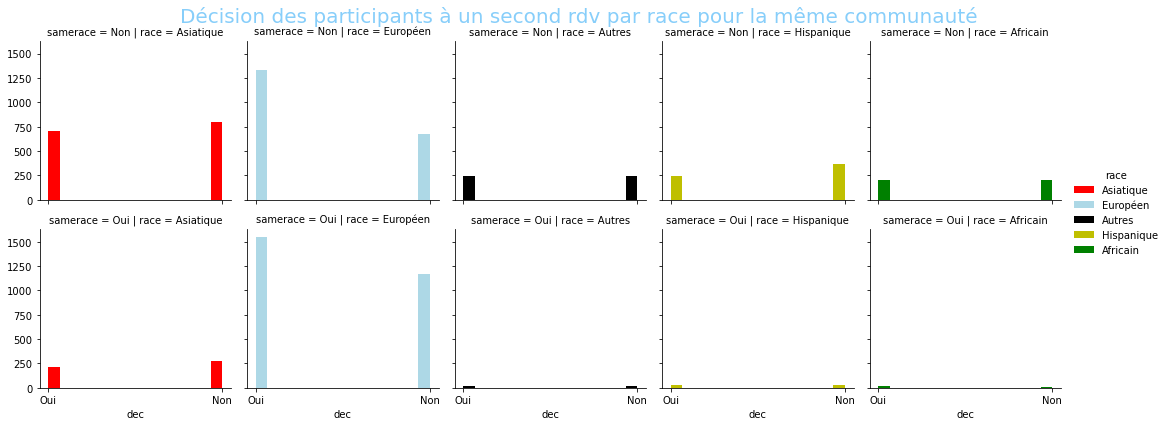

In [42]:
data_groupbysame = data[['dec','samerace', 'race','Genre']].groupby(['Genre','samerace','dec']).size().unstack()
g = sns.FacetGrid(data,row='samerace', col=('race'),hue_kws={'color': ['r', 'lightblue','black','y','g']}, hue="race")
g.map(plt.hist, 'dec', bins=15)
axes = g.axes.flatten()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Décision des participants à un second rdv par race pour la même communauté", fontsize=20,color='lightskyblue')
g.add_legend();

Ces données ont pour intérêt de visualiser en fonction des communautés et du genre, des individus présents au speed-dating ; leurs décisions de s'orienter vers une personne d'une autre communauté ou non.

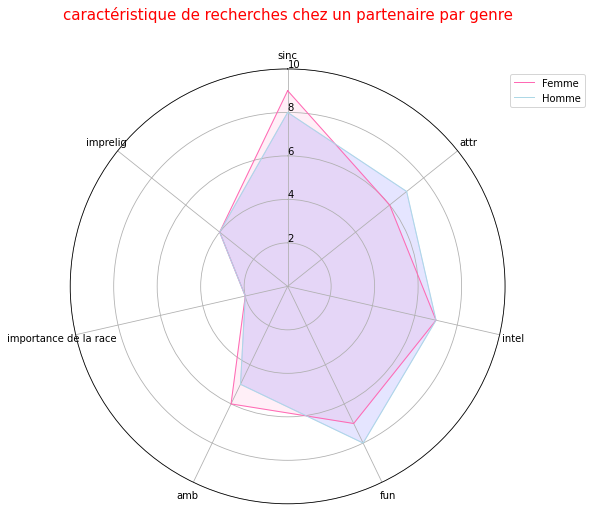

In [43]:
#set data
df = data[['Genre','sinc','attr','intel','fun','amb','importance de la race','imprelig']]

# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([2,4,6,8,10], ["2","4","6","8","10"], color="black", size=10)
plt.ylim(0,10)

# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable
 
values=df.loc[0].drop('Genre').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Femme", color='hotpink')
ax.fill(angles, values, color='hotpink', alpha=0.1)
 
values=df.loc[1].drop('Genre').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="Homme",color='lightblue')
ax.fill(angles, values, color='b', alpha=0.1)

plt.title('caractéristique de recherches chez un partenaire par genre', size=15, y=1.1, color='red')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

Grâce à ce graphique, on se rend compte que l'importance de la race n'est pas le critère le plus important pour accéder à un deuxième rendez-vous que ça soit pour les hommes ou les femmes.

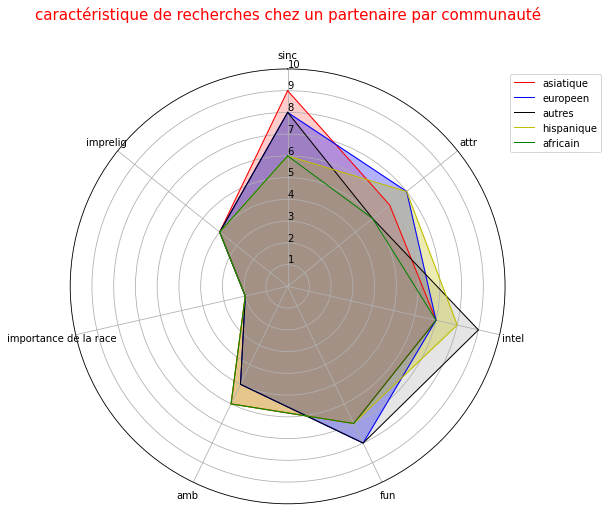

In [44]:
#set data
df = data[['race','sinc','attr','intel','fun','amb','importance de la race','imprelig']]

# ------- PART 1: Create background
# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1,2,3,4,5,6,7,8,9,10], ["1","2","3","4","5","6","7","8","9","10"], color="black", size=10)
plt.ylim(0,10)

# ------- PART 2: Add plots
# Plot each individual = each line of the data
# I don't make a loop, because plotting more than 3 groups makes the chart unreadable

values=df.loc[0].drop('race').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="asiatique", color='red')
ax.fill(angles, values, color='red', alpha=0.2)
 
values=df.loc[1].drop('race').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="europeen",color='blue')
ax.fill(angles, values, color='b', alpha=0.3)

values=df.loc[2].drop('race').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="autres", color='black')
ax.fill(angles, values, color='black', alpha=0.1)

values=df.loc[3].drop('race').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="hispanique", color='y')
ax.fill(angles, values, color='y', alpha=0.3)

values=df.loc[4].drop('race').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="africain", color='green')
ax.fill(angles, values, color='green', alpha=0.02)

plt.title('caractéristique de recherches chez un partenaire par communauté', size=15, y=1.1, color='red')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# conclusion

Nous avons taché de démontrer à travers plusieurs points d'analyses, l’éventualité  pour que deux individus s’accordent un deuxième rendez-vous après la participation d’un speed-dating.
Pour cela, nous avons choisi de nous intéresser particulièrement à l'importance du choix communautaire. 

En effet, grâce à l’analyse, nous avons pu apprendre davantage sur les caractéristiques des participants en segmentant plusieurs paramètres tels que, le genre, l’âge, le domaine d’étude, l’ethnie.

Les femmes sont plus acrochées à la communauté lors d 'une rencontre en speed-dating, alors que les hommes sont plus ouverts.
on se rend compte aussi que ce critére n'est pas la caractéristique qui va influencer l'obtention d'un deuxième rendez-vous. 

Nous pourrions également approfondir cette étude en s’intéressant à d’autres items comme la réligion, loisirs, catégorie socio-professionnelle et les attentes recherchées afin d’obtenir des matchs idéals.